In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dataclasses import dataclass

### Four-Species Decay Chain (Copper to Iron)

There's a decay chain like
$$\text{Cu} \to \text{Ni} \to \text{Co} \to \text{Fe},$$
so this is a four-species chained decay. Each step is modeled with
$$\text{Rate} = \text{Rate In} - \text{Rate Out},$$
which forms into
$$\frac{dA_{n}}{dt} = \frac{dA_{n-1}}{dt} - \lambda_{n} A_{n},$$
with
$$\frac{dA_{0}}{dt} = -\lambda_{0} A_{0},$$
where $A_{n}$ is species $n$ and $\lambda_{n}$ is the decay coefficient of $A_{n}$.

The decay coefficient is related to half life with
$$\lambda_{n} = \frac{\ln 2}{t_{1/2_{n}}}.$$

In [2]:
hl = lambda t: np.log(2)/t
NICKEL_HALF_LIFE = hl(6*24)
COBALT_HALF_LIFE = hl(77*24)

In [3]:
def calc_diff_cu(cu):
    return -COPPER_HALF_LIFE * cu

$$\frac{d[^{28}Ni]}{dt} = \lambda_{29} [^{29} Cu] - \lambda_{28}[^{28}Ni]$$

In [4]:
def calc_diff_ni(cu, ni):
    return COPPER_HALF_LIFE * cu - NICKEL_HALF_LIFE * ni

$$\frac{d[^{27}Co]}{dt} = \lambda_{28}[^{28}Ni] - \lambda_{27}[^{27}Co]$$

In [5]:
def calc_diff_co(ni, co):
    return NICKEL_HALF_LIFE * ni - COBALT_HALF_LIFE * co

$$\frac{d[^{26}Fe]}{dt} = \lambda_{27}[^{27}Co]$$

In [6]:
def calc_diff_fe(co):
    return COBALT_HALF_LIFE * co

$$A(t + \Delta t) = A(t) + A'(t) \Delta t$$

In [7]:
def update_diff(a, da, dt):
    return a + da * dt

In [8]:
@dataclass
class EulerSimulationResult:
    time: [np.float64]
    copper: [np.float64]
    nickel: [np.float64]
    cobalt: [np.float64]
    iron: [np.float64]

def perform_euler_simulation(time_step, stop_time, initial_mass):
    time_data = [0]
    copper_data = [initial_mass]
    nickel_data = [0]
    cobalt_data = [0]
    iron_data = [0]

    time = 0
    copper = initial_mass
    nickel = 0
    cobalt = 0
    iron = 0

    dt = time_step
    
    while time <= stop_time:
        time += dt
        diff_copper = calc_diff_cu(copper)
        diff_nickel = calc_diff_ni(copper, nickel)
        diff_cobalt = calc_diff_co(nickel, cobalt)
        diff_iron   = calc_diff_fe(cobalt)

        copper = update_diff(copper, diff_copper, dt)
        nickel = update_diff(nickel, diff_nickel, dt)
        cobalt = update_diff(cobalt, diff_cobalt, dt)
        iron   = update_diff(iron,   diff_iron,   dt)

        time_data.append(time)
        copper_data.append(copper)
        nickel_data.append(nickel)
        cobalt_data.append(cobalt)
        iron_data.append(iron)

    return EulerSimulationResult(time_data, copper_data, 
                                 nickel_data, cobalt_data, 
                                 iron_data)

In [9]:
def plot_result(sim):
    plt.figure()
    plt.plot(sim.time, sim.nickel, label='Nickel')
    plt.plot(sim.time, sim.cobalt, label='Cobalt')
    plt.plot(sim.time, sim.iron,   label='Iron')
    plt.plot(sim.time, sim.copper, label='Copper')
    plt.plot(sim.time, np.array(sim.nickel) + np.array(sim.cobalt) + 
                       np.array(sim.iron) + np.array(sim.copper), 
             label='Total')

    plt.title('4-Species Decay')
    plt.legend()
    plt.grid()
    plt.xlabel('Time (hours)')
    plt.ylabel('Mass (kg)')
    plt.show()

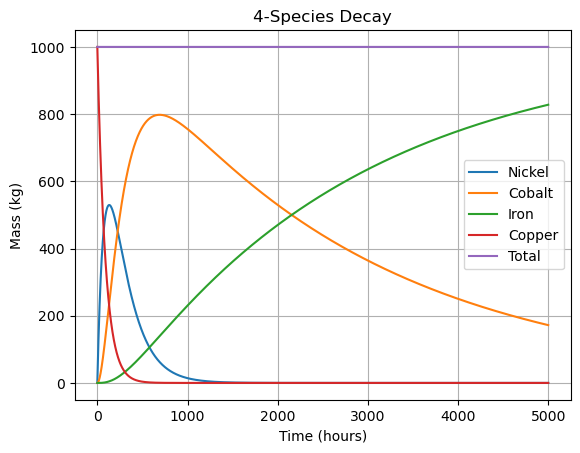

In [10]:
sim = perform_euler_simulation(time_step=0.1, 
                               stop_time=5000, 
                               initial_mass=1000)
plot_result(sim)